In [1]:
library(Seurat)
library(dplyr)
library(ggplot2)
library(patchwork)
library(tibble)
library(qs)
library(ggplot2)
library(ggridges)
library(tidyr)
library(RColorBrewer)
library(readxl)
library(stringr)
library(ggpubr) 
library(viridis)
library(reshape)
library(forestploter)
library(grid)

seed <- 123
set.seed(seed)
options(dplyr.summarise.inform = FALSE)
setwd("~/integration_project/step_14/11march_final/")

Loading required package: SeuratObject

Loading required package: sp




Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


qs 0.25.6

Loading required package: viridisLite


Attaching package: ‘reshape’


The following objects are masked from ‘package:tidyr’:

    expand, smiths


The following object is masked from ‘package:dplyr’:

    rename




In [2]:
layer_val <- read.csv("Ab_layers_forest_val.csv", header = T)
layer_val <- layer_val[-1]
colnames(layer_val)[1] <- "Group"
colnames(layer_val)[15] <- "Group.1"
colnames(layer_val)[23] <- "Group.2"
layer_val

Group,Homeo_Level0_min,Homeo_Level0_q1,Homeo_Level0_med,Homeo_Level0_q3,Homeo_Level0_max,Homeostatic,Homeo_Level0_pval,Homeo_Other_min,Homeo_Other_q1,⋯,Act_Level0_max,Activated,Act_Level0_pval,Group.2,Act_Other_min,Act_Other_q1,Act_Other_med,Act_Other_q3,Act_Other_max,Act_Other_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<lgl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Layer II-III,0.05447471,0.03501946,0.08300908,0.09468223,0.1841764,NA,2.56e-03,0.04062780,0.08989902,⋯,0.5272374,NA,6.95e-03,Layer II-III,0.1913111,0.27175882,0.3182630,0.3253906,0.4058384,6.95e-03
Layer II-VI,0.17481752,0.18905109,0.19416058,0.19854015,0.2127737,NA,1.36e-06,0.20943343,0.25095440,⋯,0.3656934,NA,1.06e-08,Layer II-VI,0.1434042,0.18291296,0.1942798,0.2092522,0.2487610,1.06e-08
Layer IV-VI,0.17946578,0.30717863,0.34724541,0.39232053,0.5200334,NA,5.33e-01,0.08809096,0.27100419,⋯,0.2721202,NA,1.28e-01,Layer IV-VI,0.0348418,0.09817403,0.1161031,0.1403955,0.2037278,1.28e-01


In [3]:
layer_val$Homeo_Level0_pval <- format(layer_val$Homeo_Level0_pval, scientific = TRUE)
layer_val$Act_Level0_pval <- format(layer_val$Act_Level0_pval, scientific = TRUE)
layer_val

Group,Homeo_Level0_min,Homeo_Level0_q1,Homeo_Level0_med,Homeo_Level0_q3,Homeo_Level0_max,Homeostatic,Homeo_Level0_pval,Homeo_Other_min,Homeo_Other_q1,⋯,Act_Level0_max,Activated,Act_Level0_pval,Group.2,Act_Other_min,Act_Other_q1,Act_Other_med,Act_Other_q3,Act_Other_max,Act_Other_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<lgl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Layer II-III,0.05447471,0.03501946,0.08300908,0.09468223,0.1841764,NA,2.56e-03,0.04062780,0.08989902,⋯,0.5272374,NA,6.95e-03,Layer II-III,0.1913111,0.27175882,0.3182630,0.3253906,0.4058384,6.95e-03
Layer II-VI,0.17481752,0.18905109,0.19416058,0.19854015,0.2127737,NA,1.36e-06,0.20943343,0.25095440,⋯,0.3656934,NA,1.06e-08,Layer II-VI,0.1434042,0.18291296,0.1942798,0.2092522,0.2487610,1.06e-08
Layer IV-VI,0.17946578,0.30717863,0.34724541,0.39232053,0.5200334,NA,5.33e-01,0.08809096,0.27100419,⋯,0.2721202,NA,1.28e-01,Layer IV-VI,0.0348418,0.09817403,0.1161031,0.1403955,0.2037278,1.28e-01


In [4]:
sample_val <- read.csv("Ab_Sample_forest_val.csv", header = T)
sample_val <- sample_val[-1]
colnames(sample_val)[1] <- "Group"
colnames(sample_val)[15] <- "Group.1"
colnames(sample_val)[23] <- "Group.2"
sample_val

Group,Homeo_Level0_min,Homeo_Level0_q1,Homeo_Level0_med,Homeo_Level0_q3,Homeo_Level0_max,Homeostatic,Homeo_Level0_pval,Homeo_Other_min,Homeo_Other_q1,⋯,Act_Level0_max,Activated,Act_Level0_pval,Group.2,Act_Other_min,Act_Other_q1,Act_Other_med,Act_Other_q3,Act_Other_max,Act_Other_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<lgl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AD-1,0.007598784,0.03951368,0.05167173,0.06079027,0.09270517,NA,0.1340,0.07808462,0.11019791,⋯,0.6519757,NA,0.3270,AD-1,-0.02073891,0.2593072,0.3584703,0.4460046,0.7260506,0.3270
AD-2,-0.108000000,0.03600000,0.11600000,0.13200000,0.27600000,NA,0.5900,-0.22071707,0.06005284,⋯,0.5400000,NA,0.8730,AD-2,0.16701950,0.2536461,0.3017347,0.3113972,0.3980237,0.8730
AD-3,-0.039062500,0.04687500,0.09375000,0.10416667,0.19010417,NA,0.0303,-0.04314302,0.09545816,⋯,0.5052083,NA,0.0142,AD-3,0.17805015,0.2323535,0.2617997,0.2685557,0.3228590,0.0142


In [5]:
sample_val$Homeo_Level0_pval <- format(sample_val$Homeo_Level0_pval, scientific = TRUE)
sample_val$Act_Level0_pval <- format(sample_val$Act_Level0_pval, scientific = TRUE)
sample_val

Group,Homeo_Level0_min,Homeo_Level0_q1,Homeo_Level0_med,Homeo_Level0_q3,Homeo_Level0_max,Homeostatic,Homeo_Level0_pval,Homeo_Other_min,Homeo_Other_q1,⋯,Act_Level0_max,Activated,Act_Level0_pval,Group.2,Act_Other_min,Act_Other_q1,Act_Other_med,Act_Other_q3,Act_Other_max,Act_Other_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<lgl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AD-1,0.007598784,0.03951368,0.05167173,0.06079027,0.09270517,NA,1.34e-01,0.07808462,0.11019791,⋯,0.6519757,NA,3.27e-01,AD-1,-0.02073891,0.2593072,0.3584703,0.4460046,0.7260506,0.3270
AD-2,-0.108000000,0.03600000,0.11600000,0.13200000,0.27600000,NA,5.90e-01,-0.22071707,0.06005284,⋯,0.5400000,NA,8.73e-01,AD-2,0.16701950,0.2536461,0.3017347,0.3113972,0.3980237,0.8730
AD-3,-0.039062500,0.04687500,0.09375000,0.10416667,0.19010417,NA,3.03e-02,-0.04314302,0.09545816,⋯,0.5052083,NA,1.42e-02,AD-3,0.17805015,0.2323535,0.2617997,0.2685557,0.3228590,0.0142


In [6]:
both <- rbind(layer_val, sample_val)
both$Homeostatic <- "" # Any NA to blank
both$Activated <- ""
both

Group,Homeo_Level0_min,Homeo_Level0_q1,Homeo_Level0_med,Homeo_Level0_q3,Homeo_Level0_max,Homeostatic,Homeo_Level0_pval,Homeo_Other_min,Homeo_Other_q1,⋯,Act_Level0_max,Activated,Act_Level0_pval,Group.2,Act_Other_min,Act_Other_q1,Act_Other_med,Act_Other_q3,Act_Other_max,Act_Other_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Layer II-III,0.054474708,0.03501946,0.08300908,0.09468223,0.18417639,,2.56e-03,0.04062780,0.08989902,⋯,0.5272374,,6.95e-03,Layer II-III,0.19131110,0.27175882,0.3182630,0.3253906,0.4058384,6.95e-03
Layer II-VI,0.174817518,0.18905109,0.19416058,0.19854015,0.21277372,,1.36e-06,0.20943343,0.25095440,⋯,0.3656934,,1.06e-08,Layer II-VI,0.14340416,0.18291296,0.1942798,0.2092522,0.2487610,1.06e-08
Layer IV-VI,0.179465776,0.30717863,0.34724541,0.39232053,0.52003339,,5.33e-01,0.08809096,0.27100419,⋯,0.2721202,,1.28e-01,Layer IV-VI,0.03484180,0.09817403,0.1161031,0.1403955,0.2037278,1.28e-01
AD-1,0.007598784,0.03951368,0.05167173,0.06079027,0.09270517,,1.34e-01,0.07808462,0.11019791,⋯,0.6519757,,3.27e-01,AD-1,-0.02073891,0.25930717,0.3584703,0.4460046,0.7260506,3.27e-01
AD-2,-0.108000000,0.03600000,0.11600000,0.13200000,0.27600000,,5.90e-01,-0.22071707,0.06005284,⋯,0.5400000,,8.73e-01,AD-2,0.16701950,0.25364610,0.3017347,0.3113972,0.3980237,8.73e-01
AD-3,-0.039062500,0.04687500,0.09375000,0.10416667,0.19010417,,3.03e-02,-0.04314302,0.09545816,⋯,0.5052083,,1.42e-02,AD-3,0.17805015,0.23235345,0.2617997,0.2685557,0.3228590,1.42e-02


In [7]:
library ("berryFunctions")


Attaching package: ‘berryFunctions’


The following object is masked from ‘package:dplyr’:

    between




In [8]:
both <-  insertRows(both, c(1,5) , new = "")
both

,Group,Homeo_Level0_min,Homeo_Level0_q1,Homeo_Level0_med,Homeo_Level0_q3,Homeo_Level0_max,Homeostatic,Homeo_Level0_pval,Homeo_Other_min,Homeo_Other_q1,⋯,Act_Level0_max,Activated,Act_Level0_pval,Group.2,Act_Other_min,Act_Other_q1,Act_Other_med,Act_Other_q3,Act_Other_max,Act_Other_pval
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,,,,,,,,,,,⋯,,,,,,,,,,
2,Layer II-III,0.0544747081712062,0.0350194552529183,0.0830090791180285,0.0946822308690013,0.184176394293126,,2.56e-03,0.0406277958202341,0.0898990224576662,⋯,0.527237354085603,,6.95e-03,Layer II-III,0.19131109591679,0.271758817283932,0.318262974542378,0.325390631528693,0.405838352895835,0.00695
3,Layer II-VI,0.174817518248175,0.189051094890511,0.194160583941606,0.198540145985401,0.212773722627737,,1.36e-06,0.209433434494958,0.250954401640837,⋯,0.365693430656934,,1.06e-08,Layer II-VI,0.143404158909121,0.182912956455016,0.194279829369885,0.209252154818946,0.248760952364841,1.06e-08
4,Layer IV-VI,0.179465776293823,0.307178631051753,0.347245409015025,0.392320534223706,0.520033388981636,,5.33e-01,0.0880909616896428,0.271004189019057,⋯,0.27212020033389,,1.28e-01,Layer IV-VI,0.0348418003368926,0.0981740319742481,0.116103147493059,0.140395519732485,0.20372775136984,0.128
5,,,,,,,,,,,⋯,,,,,,,,,,
6,AD-1,0.00759878419452887,0.0395136778115502,0.0516717325227964,0.060790273556231,0.0927051671732523,,1.34e-01,0.078084622464512,0.110197910341278,⋯,0.651975683890577,,3.27e-01,AD-1,-0.0207389063465828,0.259307170846075,0.358470313448808,0.44600455564118,0.726050632833838,0.327
7,AD-2,-0.108,0.036,0.116,0.132,0.276,,5.90e-01,-0.220717065326861,0.0600528375448219,⋯,0.54,,8.73e-01,AD-2,0.1670195048602,0.25364609602767,0.301734667840834,0.311397156805983,0.398023747973453,0.873
8,AD-3,-0.0390625,0.046875,0.09375,0.104166666666667,0.190104166666667,,3.03e-02,-0.0431430177702632,0.0954581649346566,⋯,0.505208333333333,,1.42e-02,AD-3,0.178050145482416,0.232353453290455,0.261799707013581,0.268555658495815,0.322858966303855,0.0142


In [10]:
both$Group = c("Layers","   Layer II-III","   Layer II-VI","   Layer IV-VI","Samples","   AD-1","   AD-2","   AD-3")

In [11]:
both[c(1,3,2,4:8),c(1,7,8,21,22)]

,Group,Homeostatic,Homeo_Level0_pval,Activated,Act_Level0_pval
,<chr>,<chr>,<chr>,<chr>,<chr>
1,Layers,,,,
3,Layer II-VI,,1.36e-06,,1.06e-08
2,Layer II-III,,2.56e-03,,6.95e-03
4,Layer IV-VI,,5.33e-01,,1.28e-01
5,Samples,,,,
6,AD-1,,1.34e-01,,3.27e-01
7,AD-2,,5.90e-01,,8.73e-01
8,AD-3,,3.03e-02,,1.42e-02


In [9]:
write.csv(both, "Ab_check2.csv")

Export to excel

In [14]:
both <- read_excel("/home/a.garg/integration_project/step_14/11march_final/Ab_check2.xlsx", sheet = "Sheet 1 - Ab_check2", .name_repair = "minimal")
both

Group,Homeo_Level0_min,Homeo_Level0_q1,Homeo_Level0_med,Homeo_Level0_q3,Homeo_Level0_max,Homeostatic,Homeo_Level0_pval,Homeo_Other_min,Homeo_Other_q1,⋯,Act_Level0_max,Activated,Act_Level0_pval,Group.2,Act_Other_min,Act_Other_q1,Act_Other_med,Act_Other_q3,Act_Other_max,Act_Other_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<lgl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Layer II-III,0.054474708,0.03501946,0.08300908,0.09468223,0.18417639,NA,2.56e-03,0.04062780,0.08989902,⋯,0.5272374,NA,6.95e-03,Layer II-III,0.19131110,0.27175882,0.3182630,0.3253906,0.4058384,6.95e-03
Layer II-VI,0.174817518,0.18905109,0.19416058,0.19854015,0.21277372,NA,1.36e-06,0.20943343,0.25095440,⋯,0.3656934,NA,1.06e-08,Layer II-VI,0.14340416,0.18291296,0.1942798,0.2092522,0.2487610,1.06e-08
Layer IV-VI,0.179465776,0.30717863,0.34724541,0.39232053,0.52003339,NA,5.33e-01,0.08809096,0.27100419,⋯,0.2721202,NA,1.28e-01,Layer IV-VI,0.03484180,0.09817403,0.1161031,0.1403955,0.2037278,1.28e-01
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AD-1,0.007598784,0.03951368,0.05167173,0.06079027,0.09270517,NA,1.34e-01,0.07808462,0.11019791,⋯,0.6519757,NA,3.27e-01,AD-1,-0.02073891,0.25930717,0.3584703,0.4460046,0.7260506,3.27e-01
AD-2,-0.108000000,0.03600000,0.11600000,0.13200000,0.27600000,NA,5.90e-01,-0.22071707,0.06005284,⋯,0.5400000,NA,8.73e-01,AD-2,0.16701950,0.25364610,0.3017347,0.3113972,0.3980237,8.73e-01
AD-3,-0.039062500,0.04687500,0.09375000,0.10416667,0.19010417,NA,3.03e-02,-0.04314302,0.09545816,⋯,0.5052083,NA,1.42e-02,AD-3,0.17805015,0.23235345,0.2617997,0.2685557,0.3228590,1.42e-02


In [15]:
both$Homeostatic <- "" # Any NA to blank
both$Activated <- ""

In [16]:
colnames(both) %>%as.list

[[1]]
[1] "Group"

[[2]]
[1] "Homeo_Level0_min"

[[3]]
[1] "Homeo_Level0_q1"

[[4]]
[1] "Homeo_Level0_med"

[[5]]
[1] "Homeo_Level0_q3"

[[6]]
[1] "Homeo_Level0_max"

[[7]]
[1] "Homeostatic"

[[8]]
[1] "Homeo_Level0_pval"

[[9]]
[1] "Homeo_Other_min"

[[10]]
[1] "Homeo_Other_q1"

[[11]]
[1] "Homeo_Other_med"

[[12]]
[1] "Homeo_Other_q3"

[[13]]
[1] "Homeo_Other_max"

[[14]]
[1] "Homeo_Other_pval"

[[15]]
[1] "Group.1"

[[16]]
[1] "Act_Level0_min"

[[17]]
[1] "Act_Level0_q1"

[[18]]
[1] "Act_Level0_med"

[[19]]
[1] "Act_Level0_q3"

[[20]]
[1] "Act_Level0_max"

[[21]]
[1] "Activated"

[[22]]
[1] "Act_Level0_pval"

[[23]]
[1] "Group.2"

[[24]]
[1] "Act_Other_min"

[[25]]
[1] "Act_Other_q1"

[[26]]
[1] "Act_Other_med"

[[27]]
[1] "Act_Other_q3"

[[28]]
[1] "Act_Other_max"

[[29]]
[1] "Act_Other_pval"

In [17]:
colnames(both)[8] <- "Pval"
colnames(both)[22] <- "Pval"

In [18]:
tm <- forest_theme(base_size = 10,
                   refline_lty = "dotted",
                   ci_pch = c(15, 18),
                     ci_alpha = 0.8,
                   ci_lty = 1,
                   ci_lwd = 1.5,
                   ci_Theight = 0.2, # Set an T end at the end of CI 
                   ci_col = c("#000000","#808080"),
                   footnote_col = "blue",
                   legend_name = "",
                   legend_value = c("Proximal", "Distal"),
                   core=list(
                    padding = unit(c(4, 3), "mm"),
                    fg_params=list(hjust = 1, x = 0.9)
                    #bg_params=list(fill = c("#C0C0C0","#F5F5F5"))
                    ),
                   colhead=list(fg_params=list(hjust=0.5, x=0.5))
                   
                   )

In [19]:
both

Group,Homeo_Level0_min,Homeo_Level0_q1,Homeo_Level0_med,Homeo_Level0_q3,Homeo_Level0_max,Homeostatic,Pval,Homeo_Other_min,Homeo_Other_q1,⋯,Act_Level0_max,Activated,Pval,Group.2,Act_Other_min,Act_Other_q1,Act_Other_med,Act_Other_q3,Act_Other_max,Act_Other_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,NA,NA,NA,NA,NA,,NA,NA,NA,⋯,NA,,NA,NA,NA,NA,NA,NA,NA,NA
Layer II-III,0.054474708,0.03501946,0.08300908,0.09468223,0.18417639,,2.56e-03,0.04062780,0.08989902,⋯,0.5272374,,6.95e-03,Layer II-III,0.19131110,0.27175882,0.3182630,0.3253906,0.4058384,6.95e-03
Layer II-VI,0.174817518,0.18905109,0.19416058,0.19854015,0.21277372,,1.36e-06,0.20943343,0.25095440,⋯,0.3656934,,1.06e-08,Layer II-VI,0.14340416,0.18291296,0.1942798,0.2092522,0.2487610,1.06e-08
Layer IV-VI,0.179465776,0.30717863,0.34724541,0.39232053,0.52003339,,5.33e-01,0.08809096,0.27100419,⋯,0.2721202,,1.28e-01,Layer IV-VI,0.03484180,0.09817403,0.1161031,0.1403955,0.2037278,1.28e-01
NA,NA,NA,NA,NA,NA,,NA,NA,NA,⋯,NA,,NA,NA,NA,NA,NA,NA,NA,NA
AD-1,0.007598784,0.03951368,0.05167173,0.06079027,0.09270517,,1.34e-01,0.07808462,0.11019791,⋯,0.6519757,,3.27e-01,AD-1,-0.02073891,0.25930717,0.3584703,0.4460046,0.7260506,3.27e-01
AD-2,-0.108000000,0.03600000,0.11600000,0.13200000,0.27600000,,5.90e-01,-0.22071707,0.06005284,⋯,0.5400000,,8.73e-01,AD-2,0.16701950,0.25364610,0.3017347,0.3113972,0.3980237,8.73e-01
AD-3,-0.039062500,0.04687500,0.09375000,0.10416667,0.19010417,,3.03e-02,-0.04314302,0.09545816,⋯,0.5052083,,1.42e-02,AD-3,0.17805015,0.23235345,0.2617997,0.2685557,0.3228590,1.42e-02


In [21]:
both <- both[c(1,3,2,4:8),]

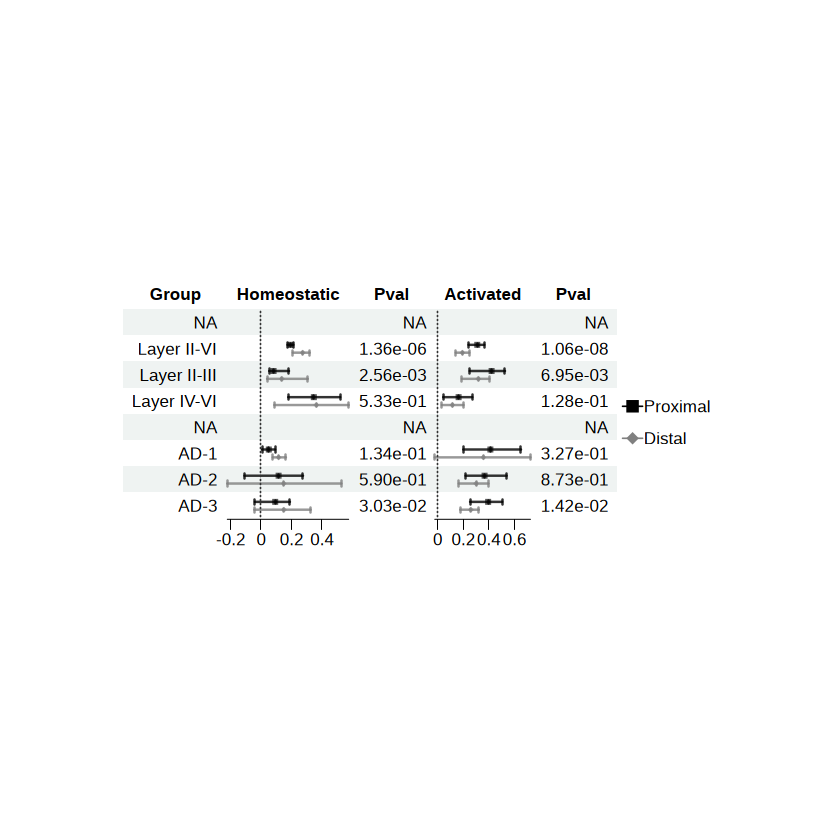

In [24]:
p <- forest(both[,c(1,7,8,21,22)],
est = list(both$Homeo_Level0_med,both$Act_Level0_med,both$Homeo_Other_med,both$Act_Other_med),
lower = list(both$Homeo_Level0_min,both$Act_Level0_min,both$Homeo_Other_min,both$Act_Other_min),
upper = list(both$Homeo_Level0_max,both$Act_Level0_max,both$Homeo_Other_max,both$Act_Other_max),
            ci_column = c(2, 4),
           ref_line = 0,
           # vert_line = c(0.5, 2),
            nudge_y = 0.3,
            theme = tm)
ggsave(p,filename = "Ab_Forestplot_both_sampleandlayers.pdf",height = 4, width = 7, bg = "white")
p